### Exercise 1

Modify `bike_to_wellesley` so it checks whether a bike is available at Olin. If not, it should add `1` to `olin_empty`.

To test it, create a `State` that initializes `olin` and `olin_empty` to `0`, run `bike_to_wellesley`, and check the result.

In [11]:
import modsim

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    # We decrease one state variable and increase the
    # other so the total number of bikes is unchanged.

    #print('Moving a bike to Wellesley')
    if state.olin == 0:
        #print("No more bikes at Olin")
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1


def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    # We decrease one state variable and increase the
    # other so the total number of bikes is unchanged.

    #print('Moving a bike to Olin')
    if state.wellesley == 0:
        #print("No more bikes at Wellesley")
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1


def step(state, p1=0.5, p2=0.5):
    if modsim.flip(p1):
        bike_to_wellesley(state)
    
    if modsim.flip(p2):
        bike_to_olin(state)

In [9]:
def run_simulation(state, p1=0.5, p2=0.5, num_steps=100):

    results = modsim.TimeSeries() # results container
    init_state = state.copy()
    
    for i in range(num_steps):
        #print(i)
        step(state, p1=p1, p2=p2)
        results[i+1] = state.olin
    
    results.plot()

    modsim.decorate(
        title='Olin-Wellesley Bikeshare',
        xlabel='Time step (min)', 
        ylabel='Number of bikes',
    )

    return results, init_state, state


In [5]:
bikeshare = modsim.State(olin=0, wellesley=12, olin_empty=0)
print(bikeshare)

olin           0
wellesley     12
olin_empty     0
dtype: int64


### Exercise 2

Now run the simulation with parameters `p1=0.3`, `p2=0.2`, and `num_steps=60`, and confirm that the number of bikes is never negative.

Start with this initial state: 
    `bikeshare = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0)`

In [15]:
bikeshare = modsim.State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0)

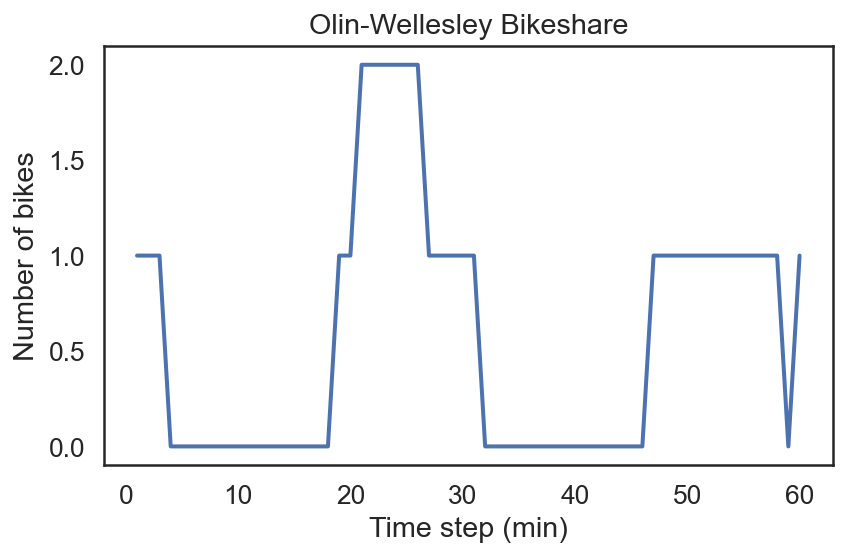

In [19]:
results, init_state, state = run_simulation(bikeshare, p1=0.3, p2=0.2, num_steps=60)

In [20]:
state

,values
olin,1
wellesley,11
olin_empty,19
wellesley_empty,0
